<a href="https://colab.research.google.com/github/MammadovN/Machine_Learning/blob/main/projects/01_supervised/classification/text_classification/text_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Total number of samples: 2957
Class distribution:
label_name
rec.sport.baseball    994
sci.med               990
comp.graphics         973
Name: count, dtype: int64


<ipython-input-1-5b988e511290>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='label_name', palette='viridis')


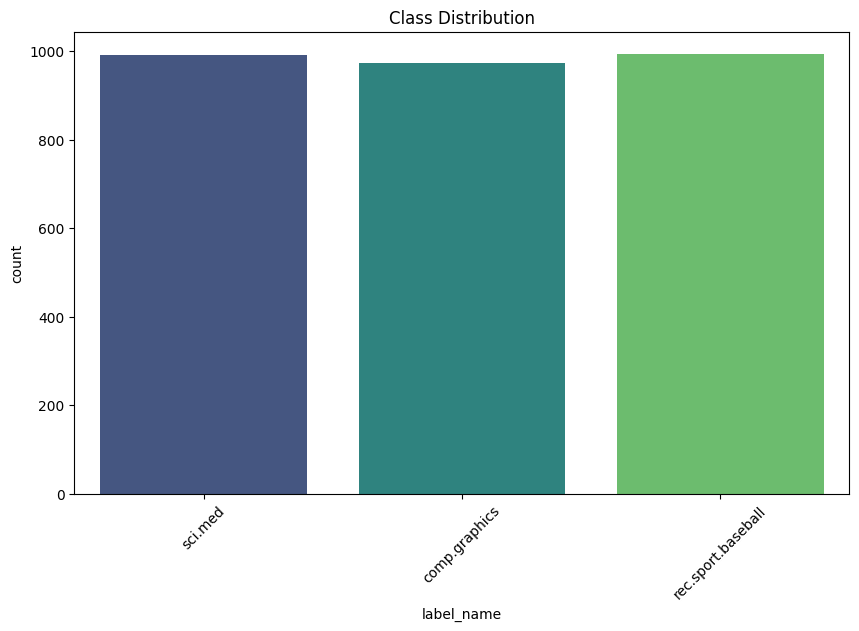

In [1]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
import matplotlib.pyplot as plt
import seaborn as sns

# Load sample dataset (for categorical classification)
categories = ['sci.med', 'comp.graphics', 'rec.sport.baseball']
newsgroups = fetch_20newsgroups(subset='all', categories=categories, remove=('headers', 'footers', 'quotes'))

df = pd.DataFrame({'text': newsgroups.data, 'label': newsgroups.target})
df['label_name'] = df['label'].apply(lambda x: newsgroups.target_names[x])

print(f"Total number of samples: {len(df)}")
print("Class distribution:")
print(df['label_name'].value_counts())

# Visualizing class imbalance
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='label_name', palette='viridis')
plt.title('Class Distribution')
plt.xticks(rotation=45)
plt.show()

In [2]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import string
import re

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

def clean_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove punctuation marks
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = nltk.word_tokenize(text)
    words = [word for word in words if word not in stop_words]

    # Apply stemming
    stemmer = SnowballStemmer('english')
    words = [stemmer.stem(word) for word in words]

    return ' '.join(words)

# Example output display
sample_text = df['text'][0]
print("Original text:\n", sample_text[:200])
print("\nCleaned text:\n", clean_text(sample_text[:200]))

# Apply to the entire dataset
df['cleaned_text'] = df['text'].apply(clean_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Original text:
 


Is that true?  I know some that won't even interview FMGs.  
Most programs discriminate, in that given an FMG equally
qualified as an American they will take the American.  What
rights do they actu

Cleaned text:
 true know wont even interview fmgs program discrimin given fmg equal qualifi american take american right actu


In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1, 2),  # Unigram and bigram
    min_df=5,
    max_df=0.7
)

X = tfidf.fit_transform(df['cleaned_text'])
y = df['label']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y  # Preserve class distribution
)

In [4]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

models = {
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': LinearSVC(C=1.0, class_weight='balanced'),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

In [5]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)

    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("F1-Score (Macro):", f1_score(y_test, y_pred, average='macro'))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=newsgroups.target_names))

    # Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix(y_test, y_pred),
                annot=True, fmt='d',
                cmap='Blues',
                xticklabels=newsgroups.target_names,
                yticklabels=newsgroups.target_names)
    plt.title('Confusion Matrix')
    plt.show()


Naive Bayes Model
Accuracy: 0.9121621621621622
F1-Score (Macro): 0.9121261883209092

Classification Report:
                    precision    recall  f1-score   support

     comp.graphics       0.88      0.92      0.90       292
rec.sport.baseball       0.91      0.93      0.92       299
           sci.med       0.95      0.88      0.91       297

          accuracy                           0.91       888
         macro avg       0.91      0.91      0.91       888
      weighted avg       0.91      0.91      0.91       888



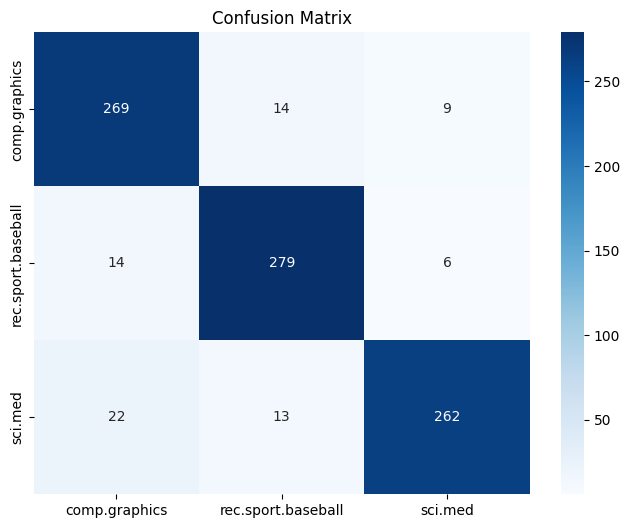


Logistic Regression Model
Accuracy: 0.9087837837837838
F1-Score (Macro): 0.9086076291681567

Classification Report:
                    precision    recall  f1-score   support

     comp.graphics       0.89      0.91      0.90       292
rec.sport.baseball       0.92      0.94      0.93       299
           sci.med       0.93      0.88      0.90       297

          accuracy                           0.91       888
         macro avg       0.91      0.91      0.91       888
      weighted avg       0.91      0.91      0.91       888



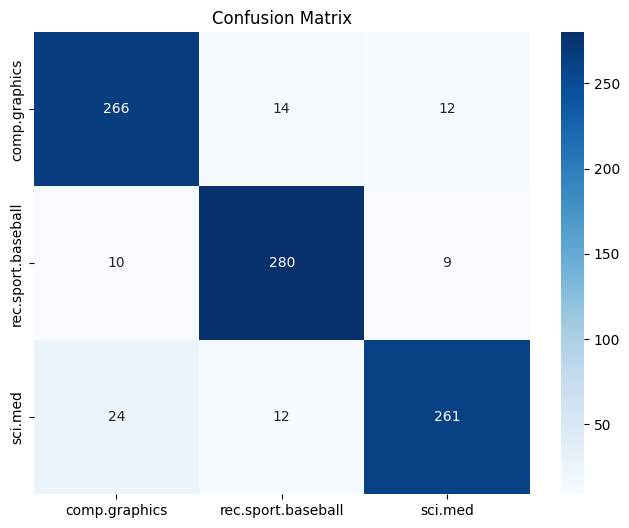


SVM Model
Accuracy: 0.9144144144144144
F1-Score (Macro): 0.9143027152866341

Classification Report:
                    precision    recall  f1-score   support

     comp.graphics       0.93      0.91      0.92       292
rec.sport.baseball       0.90      0.95      0.92       299
           sci.med       0.92      0.88      0.90       297

          accuracy                           0.91       888
         macro avg       0.92      0.91      0.91       888
      weighted avg       0.91      0.91      0.91       888



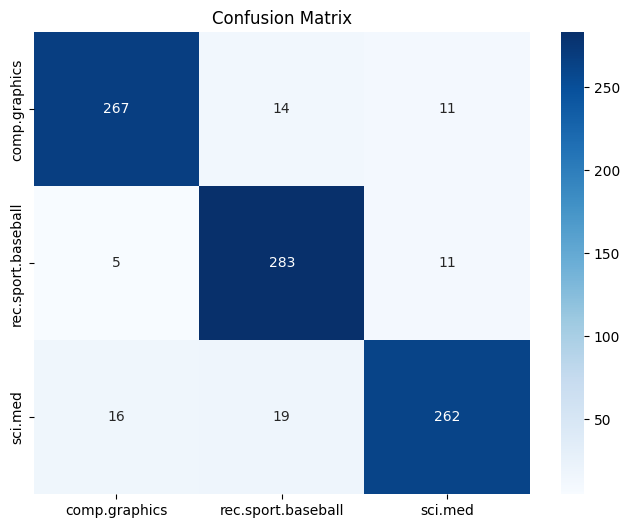


Random Forest Model
Accuracy: 0.8693693693693694
F1-Score (Macro): 0.868718171719317

Classification Report:
                    precision    recall  f1-score   support

     comp.graphics       0.85      0.90      0.87       292
rec.sport.baseball       0.85      0.92      0.88       299
           sci.med       0.92      0.79      0.85       297

          accuracy                           0.87       888
         macro avg       0.87      0.87      0.87       888
      weighted avg       0.87      0.87      0.87       888



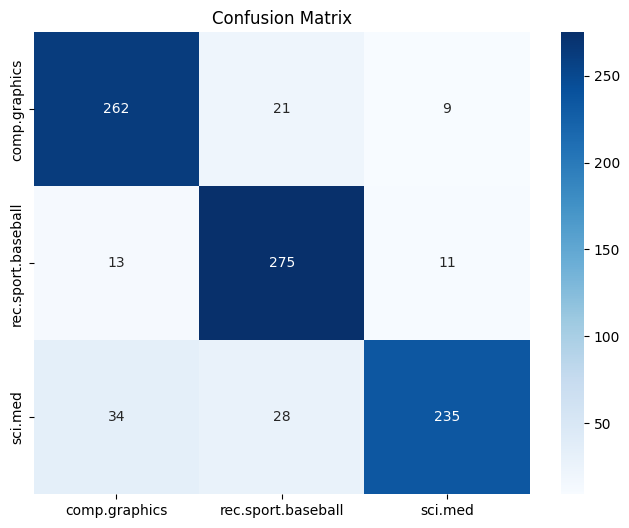


XGBoost Model


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [02:16:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.8648648648648649
F1-Score (Macro): 0.8647174838565311

Classification Report:
                    precision    recall  f1-score   support

     comp.graphics       0.88      0.85      0.87       292
rec.sport.baseball       0.83      0.91      0.87       299
           sci.med       0.89      0.83      0.86       297

          accuracy                           0.86       888
         macro avg       0.87      0.86      0.86       888
      weighted avg       0.87      0.86      0.86       888



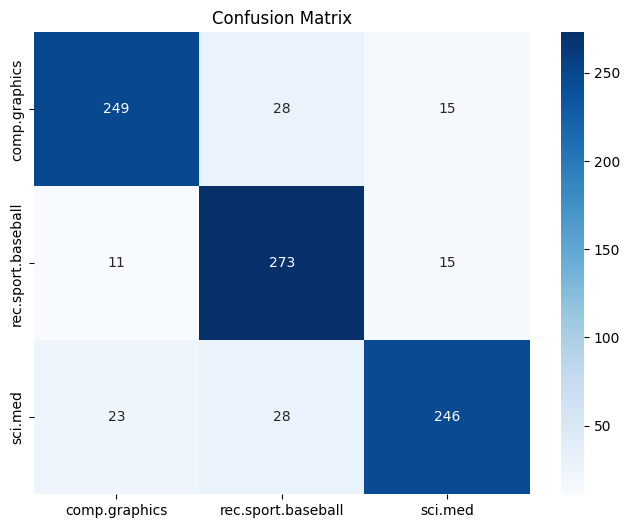

In [6]:
for name, model in models.items():
    print(f"\n{'='*50}")
    print(f"{name} Model")
    print("="*50)

    model.fit(X_train, y_train)
    evaluate_model(model, X_test, y_test)

Best parameters: {'C': 1, 'class_weight': None, 'max_iter': 1000}
Accuracy: 0.9144144144144144
F1-Score (Macro): 0.9143027152866341

Classification Report:
                    precision    recall  f1-score   support

     comp.graphics       0.93      0.91      0.92       292
rec.sport.baseball       0.90      0.95      0.92       299
           sci.med       0.92      0.88      0.90       297

          accuracy                           0.91       888
         macro avg       0.92      0.91      0.91       888
      weighted avg       0.91      0.91      0.91       888



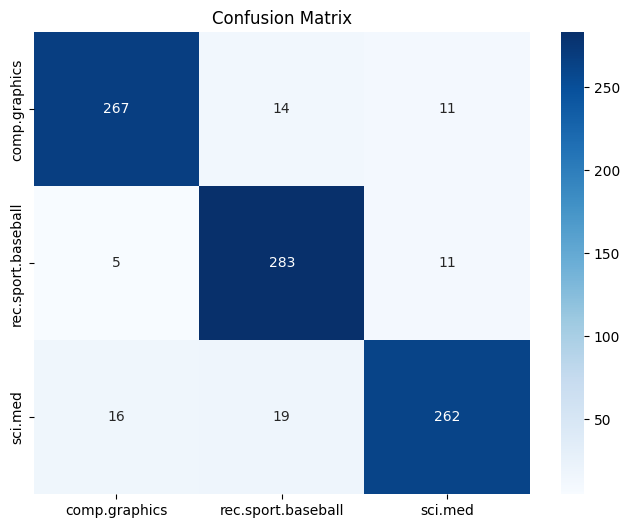

In [7]:
from sklearn.model_selection import GridSearchCV

# Parameter grid for SVM
param_grid = {
    'C': [0.1, 1, 10],
    'class_weight': [None, 'balanced'],
    'max_iter': [1000, 2000]
}

grid_search = GridSearchCV(
    LinearSVC(),
    param_grid,
    cv=5,
    scoring='f1_macro',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
evaluate_model(best_model, X_test, y_test)

In [9]:
import joblib
import pickle

# Save the model
joblib.dump(best_model, 'best_text_classifier.pkl')

# Save the TF-IDF vectorizer
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf, f)

# Load the model
loaded_model = joblib.load('best_text_classifier.pkl')
with open('tfidf_vectorizer.pkl', 'rb') as f:
    loaded_vectorizer = pickle.load(f)

# Predict on new text
def predict_text(text):
    cleaned_text = clean_text(text)
    vectorized_text = loaded_vectorizer.transform([cleaned_text])
    prediction = loaded_model.predict(vectorized_text)
    return newsgroups.target_names[prediction[0]]

# Test
sample_input = "The new graphics card has amazing performance for gaming"
print("Prediction:", predict_text(sample_input))

Prediction: comp.graphics
